# MTH5001 Introduction to Computer Programming - Lab 9
Dr Matthew Lewis and Prof. Thomas Prellberg

## Exercises

In these exercises, we will practice DataFrames and statistical plots.

<div class="alert alert-block alert-info">
    <b>Note that the module `pandas_datareader` is not installed in the labs (and on appsanywhere) by default.</b>
    
To use `pandas_datareader` in the labs, you will need to run Python in a virtual environment where you can install it explicitly for the session. **Before** executing the command`jupyter notebook` as usual, you need to execute both `virtualenv MTH5001` (the name of the environment does not actually matter) and the command `pip install pandas-datareader` (note the `-` instead of the `_` that is used within Python!). In other words, you will start your session with

```
virtualenv MTH5001
pip install pandas-datarader
jupyter notebook
```
If the code below doesn't work for you (in particular the line `import pandas_datareader.data as web`, chances are you will need to quit your jupyter notebook and restart it as just described.
    
(If you run Python on your own machine, there is normally no need to set up a virtual environment, you can just install missing modules as usual using pip or conda. And if that doesn't mean anything to you, use Google and come ask us for help.)
</div>

### Exercise 1.: DataFrames

#### Exercise 1.a.: Using `pandas_datareader.data.DataReader('DEXUSUK', 'fred')`, produce a DataFrame that contains both the USDGBP and the GBPUSD exchange rates.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from datetime import datetime

currency_rates=web.data.DataReader('DEXUSUK','fred')
currency_rates['UKUS']=1/currency_rates['DEXUSUK']
print(currency_rates)

            DEXUSUK      UKUS
DATE                         
2017-04-14   1.2531  0.798021
2017-04-17   1.2587  0.794470
2017-04-18   1.2769  0.783147
2017-04-19   1.2789  0.781922
2017-04-20   1.2830  0.779423
...             ...       ...
2022-04-04   1.3116  0.762428
2022-04-05   1.3101  0.763301
2022-04-06   1.3082  0.764409
2022-04-07   1.3060  0.765697
2022-04-08   1.3032  0.767342

[1301 rows x 2 columns]


### Exercise 2.: Statistics Plots

In the lecture, you have seen an analysis of the GBP/USD, GBP/EUR, and GBP/JPY  exchange rates. Repeat this analysis, replacing the Japanese Yen with the Swiss Franc, with a starting date of Jan 1 2010.

#### Exercise 2.a.: Load and plot the relevant currency exchange data into a DataFrame and perform any necessary conversions.

                UKUS      UKEU      UKSZ
DATE                                    
2010-01-01       NaN       NaN       NaN
2010-01-04  0.620771  0.895090  0.603042
2010-01-05  0.624649  0.899619  0.605162
2010-01-06  0.624376  0.899351  0.607251
2010-01-07  0.628457  0.899573  0.607733
...              ...       ...       ...
2022-03-21  0.757518  0.836906  0.814273
2022-03-22  0.754262  0.831347  0.808860
2022-03-23  0.756888  0.832652  0.812286
2022-03-24  0.758553  0.834863  0.814947
2022-03-25  0.757978  0.832639  0.814329

[3191 rows x 3 columns]


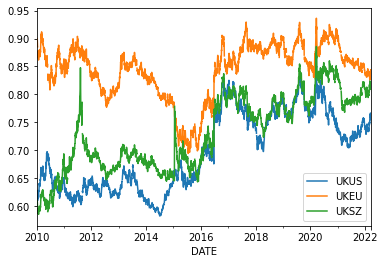

In [4]:
currency_rates=web.DataReader(['DEXUSUK','DEXUSEU','DEXSZUS'], 'fred',start=datetime(2010,1,1))
currency_rates['UKUS']=1/currency_rates['DEXUSUK']
currency_rates['UKEU']=currency_rates['UKUS']*currency_rates['DEXUSEU']
currency_rates['UKSZ']=currency_rates['UKUS']/currency_rates['DEXSZUS']
currency_rates=currency_rates.drop(columns=['DEXSZUS','DEXUSEU','DEXUSUK'])
print(currency_rates)
currency_rates.plot()
plt.show()


#### Exercise 2.b.: Compute and plot the currency returns.

                UKUS      UKEU      UKSZ
DATE                                    
2010-01-01       NaN       NaN       NaN
2010-01-04       NaN       NaN       NaN
2010-01-05  0.006246  0.005060  0.003517
2010-01-06 -0.000437 -0.000298  0.003452
2010-01-07  0.006536  0.000247  0.000793
...              ...       ...       ...
2022-03-21 -0.002424 -0.002063  0.001222
2022-03-22 -0.004299 -0.006643 -0.006648
2022-03-23  0.003482  0.001570  0.004236
2022-03-24  0.002200  0.002655  0.003277
2022-03-25 -0.000758 -0.002665 -0.000758

[3191 rows x 3 columns]


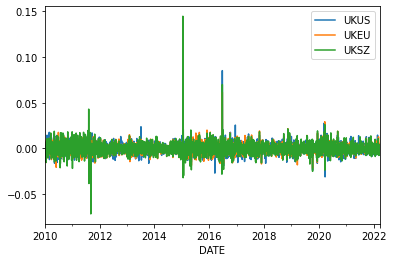

In [7]:
currency_returns=currency_rates.pct_change()
print(currency_returns)
currency_returns.plot()
plt.show()

#### Exercise 2.c.: Identify three outlier events. Find out what the reason was.

In [ ]:
###The three outliers occured in: late 2011, very early 2015, mid 2016.
###The Swiss National Bank pegged its Swiss franc to the euro on Sept. 6, 2011, this explains the first outlier
###On January 15, 2015, the Swiss National Bank unexpectedly removed the peg of 1.20 francs per euro, explaining the second outlier
###The EU referendum occured on 23rd of June 2016, which explains the outlier in 2016, as the UK was heavily affected 

#### Exercise 2.d.: Produce a Seaborn pairplot for currency returns for a two-year period starting 2012, and for a two-year period starting 2017 and describe any differences you notice.

In [ ]:
import seaborn as sns
data=currency_returns[['UKUS','UKEU']].loc['2012-1-1':'2014-1-1']
